In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ranah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ranah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ranah\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ranah\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ranah\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ranah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-

True

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


In [3]:
from nltk import pos_tag

def pos_tagging(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)  # Returns a list of (word, tag) tuples


In [4]:
from nltk import ne_chunk

def named_entity_recognition(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return ne_chunk(pos_tags)  # Returns a tree of named entities


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_tfidf(corpus):
    vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(corpus)
    return tfidf_matrix, vectorizer.get_feature_names_out()


In [6]:
def rule_based_filtering(tweets):
    filtered_tweets = []
    for tweet in tweets:
        if len(tweet.split()) < 5:  # Short tweets
            continue
        if tweet.count('#') > 3 or tweet.count('@') > 3:  # Too many hashtags/mentions
            continue
        if tweet.startswith('RT') or tweet.startswith('@'):  # Retweets or replies
            continue
        filtered_tweets.append(tweet)
    return filtered_tweets

import pandas as pd

def rule_based_filtering_df(df, content_column='cleaned_tweets'):
    def is_relevant(tweet):
        if len(tweet.split()) < 5:  # Filter out short tweets
            return False
        if tweet.count('#') > 3 or tweet.count('@') > 3:  # Too many hashtags/mentions
            return False
        if tweet.startswith('RT') or tweet.startswith('@'):  # Retweets or replies
            return False
        return True

    # Apply filtering logic to the content column
    filtered_df = df[df[content_column].apply(is_relevant)].reset_index(drop=True)
    return filtered_df



In [7]:
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer

def apply_clustering(tweets):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(tweets)
    dbscan = DBSCAN(eps=0.7, min_samples=200)
    labels = dbscan.fit_predict(embeddings)
    clustered_tweets = [tweet for tweet, label in zip(tweets, labels) if label != -1]
    return clustered_tweets


c:\Users\ranah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [8]:
from sklearn.cluster import KMeans

def cluster_with_tfidf(tfidf_matrix, tweets):
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(tfidf_matrix)
    clustered_tweets = {label: [] for label in set(labels)}
    for label, tweet in zip(labels, tweets):
        clustered_tweets[label].append(tweet)
    return clustered_tweets


In [9]:
from bertopic import BERTopic

def apply_topic_modeling(tweets):
    topic_model = BERTopic()
    topics, _ = topic_model.fit_transform(tweets)
    topic_info = topic_model.get_topic_info()
    relevant_topics = topic_info[topic_info['Name'].str.contains("startup|government|tech", case=False)]['Topic'].tolist()
    relevant_tweets = [tweet for tweet, topic in zip(tweets, topics) if topic in relevant_topics]
    return relevant_tweets, topic_model


In [10]:
from bertopic import BERTopic
from collections import defaultdict

def topic_based_clustering(tweets):
    # Step 1: Initialize BERTopic
    topic_model = BERTopic()

    # Step 2: Fit the model and get topic assignments
    topics, _ = topic_model.fit_transform(tweets)

    # Step 3: Group tweets by their assigned topics
    topic_clusters = defaultdict(list)
    for tweet, topic in zip(tweets, topics):
        topic_clusters[topic].append(tweet)

    # Step 4: Exclude outliers (Topic -1 is assigned to noise in BERTopic)
    clustered_tweets = {topic: tweets for topic, tweets in topic_clusters.items() if topic != -1}

    return clustered_tweets, topic_model

In [12]:
import pandas as pd

df=pd.read_csv("tweets\RU_WAR_1-1000.csv")

tweets=df['Content']


In [13]:
# Step 1: Clean Tweets
cleaned_tweets = [clean_text(tweet) for tweet in tweets]
df['cleaned_tweets']=cleaned_tweets
df[['Content','cleaned_tweets']].head(5)



,Content,cleaned_tweets
0,I hate that we are at war in Ukraine. \n\nI ha...,hate war ukraine hate russia using goal end pr...
1,The people of Ukraine want to end the war. It'...,people ukraine want end war unelected dictator...
2,Putin says Ukraine war is going global \nSourc...,putin say ukraine war going global source reut...
3,Not Mark Levin— Pro War— Pro Ukraine War— Pro ...,mark pro pro ukraine pro middle east war
4,Promoting Russian expansionism when the West i...,promoting russian expansionism west weakest de...


In [22]:

filtered_df = rule_based_filtering_df(df)
# filtered_df[['Content','cleaned_tweets']].head()
filtered_df.to_csv("Filtered_ISREAL.csv")
filtered_tweets=filtered_df['cleaned_tweets']

In [ ]:

# Step 3: POS Tagging (Optional)
pos_tagged_tweets = [pos_tagging(tweet) for tweet in filtered_tweets]
print("POS Tagged Tweets:", pos_tagged_tweets)

# Step 4: Named Entity Recognition (Optional)
ner_tweets = [named_entity_recognition(tweet) for tweet in filtered_tweets]
print("NER Results:", ner_tweets)


In [17]:

# Step 5: TF-IDF Vectorization
tfidf_matrix, feature_names = calculate_tfidf(filtered_tweets)
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("TF-IDF Matrix:",feature_names )



TF-IDF Matrix Shape: (503, 500)
TF-IDF Matrix: ['action' 'actually' 'afghanistan' 'africa' 'african' 'agent' 'ago'
 'agree' 'ahead' 'aid' 'air' 'aka' 'ali' 'allah' 'allowed' 'ally'
 'america' 'american' 'answer' 'antisemitism' 'anybody' 'apartheid' 'arab'
 'armed' 'arming' 'army' 'article' 'ask' 'associate' 'attack' 'attacked'
 'attempt' 'aviv' 'baby' 'bad' 'bangladesh' 'bank' 'base' 'bbc' 'bd'
 'beirut' 'believe' 'better' 'biden' 'biggest' 'billion' 'bio' 'blame'
 'block' 'blood' 'bomb' 'bombed' 'bombing' 'book' 'border' 'born'
 'boycott' 'brave' 'breaking' 'brigade' 'bring' 'british' 'brother' 'ca'
 'called' 'calling' 'came' 'camp' 'canada' 'care' 'case' 'cause'
 'ceasefire' 'change' 'check' 'child' 'choose' 'chris' 'christian'
 'citizen' 'city' 'civilian' 'clear' 'close' 'cold' 'combat' 'come'
 'coming' 'comment' 'committing' 'common' 'company' 'complicit'
 'complicity' 'conduct' 'conflict' 'conqueror' 'considered' 'continue'
 'control' 'country' 'crime' 'criminal' 'crisis' 'cut' 'd

In [45]:
from bertopic import BERTopic
import pandas as pd
from collections import defaultdict

def topic_based_clustering_df(tweets, tweet_ids=None):
    """
    Perform topic-based clustering on a list of tweets and return a dataframe.

    Parameters:
        tweets (list of str): The tweets to cluster.
        tweet_ids (list of int or str, optional): IDs for tweets (if available).
    
    Returns:
        pd.DataFrame: DataFrame containing tweets, topic IDs, and topic descriptions.
    """
    # Step 1: Initialize BERTopic
    topic_model = BERTopic()

    # Step 2: Fit the model and get topic assignments
    topics, _ = topic_model.fit_transform(tweets)

    # Step 3: Create a DataFrame for tweets and their assigned topics
    df = pd.DataFrame({
        'tweet_id': tweet_ids if tweet_ids else range(len(tweets)),
        'tweet_content': tweets,
        'topic_id': topics
    })

    # Step 4: Get detailed topic information
    topic_info = topic_model.get_topic_info()

    # Step 5: Merge topic descriptions into the DataFrame
    topic_info.rename(columns={'Topic': 'topic_id', 'Name': 'topic_description'}, inplace=True)
    df = df.merge(topic_info[['topic_id', 'topic_description']], on='topic_id', how='left')

    # Step 6: Remove outliers (optional)
    filtered_df = df[df['topic_id'] != -1].reset_index(drop=True)

    return filtered_df, topic_model


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

def perform_dbscan(tweets, eps=0.7, min_samples=5):
    """
    Perform DBSCAN clustering on tweets and ensure only 2 clusters are formed.

    Parameters:
        tweets (list of str): List of tweet texts.
        eps (float): Maximum distance for DBSCAN.
        min_samples (int): Minimum samples for DBSCAN.

    Returns:
        pd.DataFrame: DataFrame with tweets and their cluster labels.
    """
    # Step 1: Convert tweets to TF-IDF embeddings
    vectorizer = TfidfVectorizer(max_features=100)  # Use top 300 features
    tfidf_matrix = vectorizer.fit_transform(tweets).toarray()

    # Step 2: Normalize embeddings
    scaler = StandardScaler()
    normalized_embeddings = scaler.fit_transform(tfidf_matrix)

    # Step 3: Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(normalized_embeddings)

    # Step 4: Ensure only 2 clusters (excluding noise labeled as -1)
    unique_clusters = len(set(labels)) 
    if unique_clusters != 2:
        print(f"Warning: Found {unique_clusters} clusters. Adjust eps or min_samples.")

    # Step 5: Create a DataFrame with results
    df = pd.DataFrame({
        'tweet_content': tweets,
        'cluster_label': labels
    })

    return df


In [42]:
result_df = perform_dbscan(filtered_tweets, eps=0.5, min_samples=10)
print(result_df[['cluster_label']==-1])

KeyError: False

In [51]:

# Step 6: Topic Modeling
relevant_tweets_df, topic_model = topic_based_clustering_df(filtered_tweets)
print(relevant_tweets_df.tail(10))



     tweet_id                                      tweet_content  topic_id  \
248       488  mr zionist foreign agent genocider occupying g...         1   
249       489  history much less kind jstreet become organisa...         9   
250       491  absolute whitewashing propaganda podcast lost ...         5   
251       492  iran ever going respond true downgraded nuclea...         7   
252       495  west support israel genocide destroying world ...         1   
253       497  accuses word beacon truth show evidence believ...         4   
254       498  gaza conflict update palestinian killed distur...         0   
255       499            yaa allah seen genocide child palestine         3   
256       500  one hand want israel exist hand come jew exile...         9   
257       502  minority better country region sure one ever h...         1   

                         topic_description  
248  1_genocide_apartheid_israel_holocaust  
249             9_war_jew_eradicate_israel  
250   

In [18]:

# Step 7: Clustering
final_tweets = apply_clustering(filtered_tweets)
print("Final Tweets after Clustering:", final_tweets)

Final Tweets after Clustering: []


In [ ]:
final_tweets=cluster_with_tfidf(tfidf_matrix,filtered_tweets)
final_tweets

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

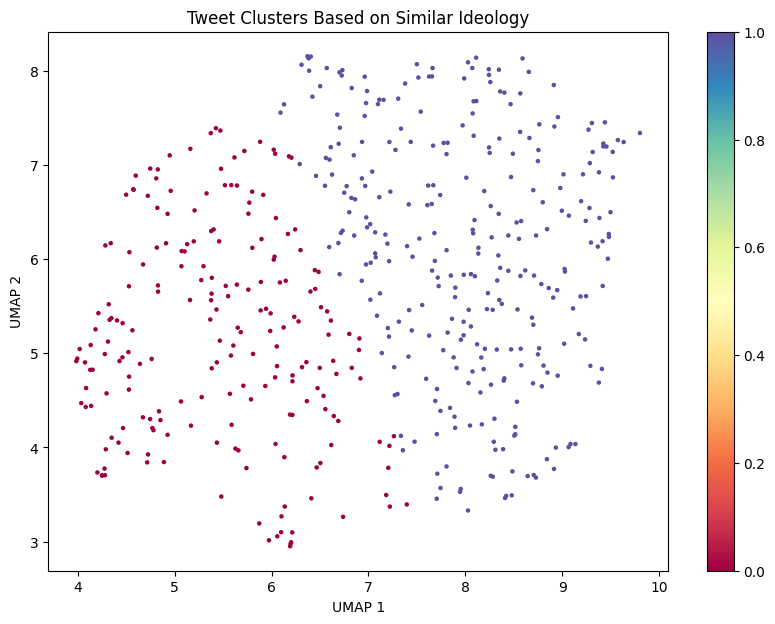

In [58]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt

# Load the cleaned tweets
# file_path = 'cleaned_tweets.xlsx'
# tweets_df = pd.read_excel(file_path)
tweets =filtered_tweets

# Step 1: Use Sentence Transformers (BERT-based) to encode tweets
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(tweets, show_progress_bar=True)

# Step 2: Dimensionality Reduction with UMAP
umap_reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
reduced_embeddings = umap_reducer.fit_transform(embeddings)

# Step 3: Clustering using K-Means
num_clusters = 2  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(reduced_embeddings)
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
# tweets_df['cluster'] = cluster_labels

# Step 4: Visualize the Clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='Spectral', s=5)
plt.title('Tweet Clusters Based on Similar Ideology')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar()
plt.show()

In [29]:
import pandas as pd
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import classification_report, accuracy_score

# Preprocess function to ignore -1 in label combination

# Preprocess function to ignore -1 and cast to integer labels

def preprocess_labels(df, label_columns):
    def determine_label(row):
        # Get the values from the label columns
        values = row[label_columns].values
        # Ignore -1 values
        relevant_values = values[values != -1]
        
        if len(relevant_values) == 0:
            return -1  # If no valid labels, return -1 (for undefined cases)

        # Count occurrences of 0, 1, 2 manually
        counts = {0: 0, 1: 0, 2: 0}
        for value in relevant_values:
            if value in counts:
                counts[value] += 1

        # Find the label with the highest frequency
        max_label = max(counts, key=counts.get)

        # print(f"Label counts (ignoring -1): {counts}, Most frequent: {max_label}")
        return max_label

    # Apply the function to create the combined label column
    df["combined_label"] = df.apply(determine_label, axis=1)
    df["combined_label"] = df["combined_label"].astype(int)  # Ensure the column is of type int
    return df

# Train and test function remains unchanged
def train_and_test(train_df, test_df, label_columns):
    # Preprocess labels
    train_df = preprocess_labels(train_df, label_columns)
    test_df = preprocess_labels(test_df, label_columns)
    train_df.to_csv('letsee')
    # Extract texts and labels
    train_texts, train_labels = train_df['tokenized tweet'].tolist(), train_df['combined_label'].tolist()
    test_texts, test_labels = test_df['tokenized tweet'].tolist(), test_df['combined_label'].tolist()

    # Tokenizer
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

    # Create Datasets and DataLoaders
    class TweetDataset(Dataset):
        def __init__(self, texts, labels, tokenizer, max_len=128):
            self.texts = texts
            self.labels = labels
            self.tokenizer = tokenizer
            self.max_len = max_len

        def __len__(self):
            return len(self.texts)

        def __getitem__(self, idx):
            text = self.texts[idx]
            label = self.labels[idx]
            encoding = self.tokenizer.encode_plus(
                text,
                max_length=self.max_len,
                padding="max_length",
                truncation=True,
                return_tensors="pt"
            )
            return {
                "input_ids": encoding["input_ids"].squeeze(),
                "attention_mask": encoding["attention_mask"].squeeze(),
                "label": torch.tensor(label, dtype=torch.long),
            }

    train_dataset = TweetDataset(train_texts, train_labels, tokenizer)
    test_dataset = TweetDataset(test_texts, test_labels, tokenizer)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Model and Optimizer
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3).to(device)
    optimizer = AdamW(model.parameters(), lr=5e-5)

    # Training (Single Pass)
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        print(f"Training Loss: {loss.item()}")

    # Testing
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["label"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())

    # Metrics
    accuracy = accuracy_score(all_labels, all_preds)
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=["Left", "Center", "Right"]))
    print(f"Accuracy: {accuracy:.4f}")

    return model, tokenizer, device

# Prediction function
def predict(model, tokenizer, device, df):
    texts = df["cleaned_tweets"].tolist()
    class TweetDataset(Dataset):
        def __init__(self, texts, tokenizer, max_len=128):
            self.texts = texts
            self.tokenizer = tokenizer
            self.max_len = max_len

        def __len__(self):
            return len(self.texts)

        def __getitem__(self, idx):
            text = self.texts[idx]
            encoding = self.tokenizer.encode_plus(
                text,
                max_length=self.max_len,
                padding="max_length",
                truncation=True,
                return_tensors="pt"
            )
            return {
                "input_ids": encoding["input_ids"].squeeze(),
                "attention_mask": encoding["attention_mask"].squeeze(),
            }

    dataset = TweetDataset(texts, tokenizer)
    loader = DataLoader(dataset, batch_size=32, shuffle=False)

    model.eval()
    predictions = []
    with torch.no_grad():
        for batch in loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)
            predictions.extend(preds.cpu().tolist())

    df["predicted_label"] = predictions
    df["predicted_label"] = df["predicted_label"].map({0: "Left", 1: "Center", 2: "Right"})
    return df



# Load your datasets
train_df = pd.read_csv("testing\\train.csv")  # Replace with your training dataset
test_df = pd.read_csv("testing\\test.csv")    # Replace with your testing dataset

# Define label columns (e.g., I1, I2, ..., In)
label_columns = [col for col in train_df.columns if col.startswith("I")]
print(train_df[label_columns].describe())
# Train and test the model
model, tokenizer, device = train_and_test(train_df, test_df, label_columns)

# Predict on unknown tweets
df=pd.read_csv('tweets//RU_WAR_1-1000.csv')
cleaned_tweets = [clean_text(tweet) for tweet in tweets]
df['cleaned_tweets']=cleaned_tweets


filtered_df = rule_based_filtering_df(df)
# filtered_df[['Content','cleaned_tweets']].head()
filtered_df.to_csv("Filtered_RU.csv")
filtered_tweets=filtered_df['cleaned_tweets']

unknown_tweets = filtered_tweets.tolist()
predictions = predict(model, tokenizer, device, filtered_df)

# Display predictions
for tweet, prediction in zip(unknown_tweets, predictions):
    print(f"Tweet: {tweet}\nPredicted Label: {prediction}")


                I1           I2           I3           I4           I5  \
count  8816.000000  8816.000000  8816.000000  8816.000000  8816.000000   
mean     -0.980263    -0.947936    -0.889973    -0.930921    -0.647459   
std       0.224573     0.356625     0.472892     0.314687     0.741930   
min      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
25%      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
50%      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
75%      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000   
max       2.000000     2.000000     2.000000     2.000000     2.000000   

                I6           I7           I8           I9          I10  \
count  8816.000000  8816.000000  8816.000000  8816.000000  8816.000000   
mean     -0.990699    -0.979469    -0.768829    -0.629083    -0.803652   
std       0.142595     0.210146     0.676053     0.927374     0.558046   
min      -1.000000    -1.000000    -1

model.safetensors:   7%|7         | 31.5M/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
